# Pandas 2

In our previous lecture, we focused on the fundamentals of `pandas`, including the layout of `DataFrames` and how you can access data within them. Today, we'll move on to some more advanced topics, including `DataFrame` mergers, groupby operations, and data cleaning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We'll use these datasets as examples today:

In [2]:
df1 = pd.read_csv('lecture14_athletes_men400m.csv')
df2 = pd.read_csv('lecture15_athletes_women400m.csv')

### Often, we have to deal with multiple files with identical format. We can easily combine two `DataFrames` by concatenating with `pd.concat()`.

In [3]:
# df1 stacked on df1
df_both = pd.concat([df1, df2])
df_both.head() # top of combined is df1

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
0,Abubakar Abbas Abbas,M,20.0,175.0,66.0,Bahrain,2016,Athletics Men's 400 meters,NaN
1,Maher Abbas,M,22.0,178.0,78.0,Lebanon,1988,Athletics Men's 400 meters,NaN
2,Moustafa Abdel Naser,M,21.0,176.0,74.0,Libya,1996,Athletics Men's 400 meters,NaN
3,Hassane Abdou,M,23.0,185.0,67.0,Comoros,1996,Athletics Men's 400 meters,NaN
4,Nagmeldin Ali Abubakr,M,18.0,172.0,63.0,Sudan,2004,Athletics Men's 400 meters,NaN


In [4]:
df_both.tail() # bottom of combined is df2

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
589,Monika Zehrt (-Landgraf),F,19.0,168.0,56.0,East Germany,1972,Athletics Women's 400 meters,Gold
590,Olha Mykolayivna Zemliak,F,26.0,165.0,57.0,Ukraine,2016,Athletics Women's 400 meters,NaN
591,Boena Zientarska (-Markiewicz),F,19.0,165.0,58.0,Poland,1972,Athletics Women's 400 meters,NaN
592,Nina Anatolivna Ziuskova,F,28.0,180.0,67.0,Soviet Union,1980,Athletics Women's 400 meters,NaN
593,Marina ivkovi (Filipovi-),F,25.0,174.0,57.0,Serbia and Montenegro,1996,Athletics Women's 400 meters,NaN


In [5]:
df_both.shape # notice how this does not match the index!

(2011, 9)

#### Often, the row index is just a number and we'd like to reset this after concatenation. One way to do so is the following: 

In [6]:
# If row index does not have any relevant meaning 
df_both = pd.concat([df1, df2], ignore_index=True)
df_both.tail()

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
2006,Monika Zehrt (-Landgraf),F,19.0,168.0,56.0,East Germany,1972,Athletics Women's 400 meters,Gold
2007,Olha Mykolayivna Zemliak,F,26.0,165.0,57.0,Ukraine,2016,Athletics Women's 400 meters,NaN
2008,Boena Zientarska (-Markiewicz),F,19.0,165.0,58.0,Poland,1972,Athletics Women's 400 meters,NaN
2009,Nina Anatolivna Ziuskova,F,28.0,180.0,67.0,Soviet Union,1980,Athletics Women's 400 meters,NaN
2010,Marina ivkovi (Filipovi-),F,25.0,174.0,57.0,Serbia and Montenegro,1996,Athletics Women's 400 meters,NaN


#### Another option is `reset_index()`, which is useful to know about for other contexts as well (like our slicing examples in the previous lecture):

In [7]:
# Same as above using reset_index()
df_both = pd.concat([df1, df2])
df_both.reset_index(inplace=True, drop=True) # modify without copying, and drop old index
df_both.tail()

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
2006,Monika Zehrt (-Landgraf),F,19.0,168.0,56.0,East Germany,1972,Athletics Women's 400 meters,Gold
2007,Olha Mykolayivna Zemliak,F,26.0,165.0,57.0,Ukraine,2016,Athletics Women's 400 meters,NaN
2008,Boena Zientarska (-Markiewicz),F,19.0,165.0,58.0,Poland,1972,Athletics Women's 400 meters,NaN
2009,Nina Anatolivna Ziuskova,F,28.0,180.0,67.0,Soviet Union,1980,Athletics Women's 400 meters,NaN
2010,Marina ivkovi (Filipovi-),F,25.0,174.0,57.0,Serbia and Montenegro,1996,Athletics Women's 400 meters,NaN


### Very often we want to merge information from two separate files. Pandas makes this easy with `pd.merge()`.

* 'lecture15_ratings.csv' has restaurant ratings
* 'lecture15_parking.csv' has parking information for restaurants

In [8]:
# Ratings database
ratings = pd.read_csv("lecture15_ratings.csv")
print(len(ratings["placeID"].unique()))
ratings

130


,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [9]:
# Parking database
parking = pd.read_csv("lecture15_parking.csv")
parking= parking.drop_duplicates(subset="placeID").reset_index(drop=True) # remove duplicate rows
print(len(parking["placeID"].unique()))
parking

675


,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none
...,...,...
670,132030,street
671,132026,fee
672,132024,street
673,132023,fee


### Both `DataFrames` have a column 'placeID' - we will merge on that key

Whenever you have two different databases, there are different ways you could consider merging them. This concept is fundamental to relational database management systems like SQL.

In pandas, we control the mergin with the "how" argument in `pd.merge()`:

* `how="left"`: a merged `DataFrame` with the keys from the left `DataFrame` 
* `how="right"`: a merged `DataFrame` with the keys from the right `DataFrame` 
* `how="inner"`: a merged `DataFrame` with only keys that appear in both `DataFrames`
* `how="outer"`: a merged `DataFrame` with all keys from either `DataFrame` 

In our restaurant example, a left merge would result in only restaurants that have ratings information, a right merge would result in only restaurants that have parking information, an inner merge would result in only restaurants with both ratings and parking information, and an outer merge would result in all restaurants with either ratings or parking information.

In [10]:
# left merge
mergedL = pd.merge(left=ratings, right=parking,
                  on="placeID", how="left")
print(len(mergedL["placeID"].unique()))
mergedL

130


,userID,placeID,rating,food_rating,service_rating,parking_lot
0,U1077,135085,2,2,2,public
1,U1077,135038,2,2,1,none
2,U1077,132825,2,2,2,none
3,U1077,135060,1,2,2,none
4,U1068,135104,1,1,2,yes
...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,none
1157,U1011,132715,1,1,0,none
1158,U1068,132733,1,1,0,yes
1159,U1068,132594,1,1,1,public


In [11]:
# right merge
mergedR = pd.merge(left=ratings, right=parking,
                  on="placeID", how="right")
print(len(mergedR["placeID"].unique()))
mergedR

675


,userID,placeID,rating,food_rating,service_rating,parking_lot
0,NaN,135111,NaN,NaN,NaN,public
1,NaN,135110,NaN,NaN,NaN,none
2,U1030,135109,0.0,0.0,0.0,none
3,U1020,135109,2.0,2.0,1.0,none
4,U1051,135109,1.0,1.0,1.0,none
...,...,...,...,...,...,...
1701,NaN,132030,NaN,NaN,NaN,street
1702,NaN,132026,NaN,NaN,NaN,fee
1703,NaN,132024,NaN,NaN,NaN,street
1704,NaN,132023,NaN,NaN,NaN,fee


In [12]:
# inner merge in this case is similar to a left merge
mergedI = pd.merge(left=ratings, right=parking,
                  on="placeID", how="inner")
print(len(mergedI["placeID"].unique()))
mergedI

130


,userID,placeID,rating,food_rating,service_rating,parking_lot
0,U1077,135085,2,2,2,public
1,U1108,135085,1,2,1,public
2,U1081,135085,1,2,1,public
3,U1056,135085,2,2,2,public
4,U1134,135085,2,1,2,public
...,...,...,...,...,...,...
1156,U1061,132958,2,2,2,none
1157,U1025,132958,1,0,0,none
1158,U1097,132958,2,1,1,none
1159,U1096,132958,1,2,2,none


In [13]:
# outer merge in this case is similar to the right merge
mergedO = pd.merge(left=ratings, right=parking,
                  on="placeID", how="outer")
print(len(mergedO["placeID"].unique()))
mergedO

675


,userID,placeID,rating,food_rating,service_rating,parking_lot
0,U1077,135085,2.0,2.0,2.0,public
1,U1108,135085,1.0,2.0,1.0,public
2,U1081,135085,1.0,2.0,1.0,public
3,U1056,135085,2.0,2.0,2.0,public
4,U1134,135085,2.0,1.0,2.0,public
...,...,...,...,...,...,...
1701,NaN,132030,NaN,NaN,NaN,street
1702,NaN,132026,NaN,NaN,NaN,fee
1703,NaN,132024,NaN,NaN,NaN,street
1704,NaN,132023,NaN,NaN,NaN,fee


### `pandas` is very useful for helping us subset data within a table by categorical groups. This is called a `groupby` operation. 

#### We will first examine the combined M/F 400m dash data, which is in the `DataFrame` `df_both`

In [14]:
# view the df
df_both

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
0,Abubakar Abbas Abbas,M,20.0,175.0,66.0,Bahrain,2016,Athletics Men's 400 meters,NaN
1,Maher Abbas,M,22.0,178.0,78.0,Lebanon,1988,Athletics Men's 400 meters,NaN
2,Moustafa Abdel Naser,M,21.0,176.0,74.0,Libya,1996,Athletics Men's 400 meters,NaN
3,Hassane Abdou,M,23.0,185.0,67.0,Comoros,1996,Athletics Men's 400 meters,NaN
4,Nagmeldin Ali Abubakr,M,18.0,172.0,63.0,Sudan,2004,Athletics Men's 400 meters,NaN
...,...,...,...,...,...,...,...,...,...
2006,Monika Zehrt (-Landgraf),F,19.0,168.0,56.0,East Germany,1972,Athletics Women's 400 meters,Gold
2007,Olha Mykolayivna Zemliak,F,26.0,165.0,57.0,Ukraine,2016,Athletics Women's 400 meters,NaN
2008,Boena Zientarska (-Markiewicz),F,19.0,165.0,58.0,Poland,1972,Athletics Women's 400 meters,NaN
2009,Nina Anatolivna Ziuskova,F,28.0,180.0,67.0,Soviet Union,1980,Athletics Women's 400 meters,NaN


### Group data using `groupby(column)`

In [15]:
# groupby example
df_grouped = df_both.groupby("Sex") # group data by Sex
df_grouped.head() # note that this shows head of both groups

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
0,Abubakar Abbas Abbas,M,20.0,175.0,66.0,Bahrain,2016,Athletics Men's 400 meters,NaN
1,Maher Abbas,M,22.0,178.0,78.0,Lebanon,1988,Athletics Men's 400 meters,NaN
2,Moustafa Abdel Naser,M,21.0,176.0,74.0,Libya,1996,Athletics Men's 400 meters,NaN
3,Hassane Abdou,M,23.0,185.0,67.0,Comoros,1996,Athletics Men's 400 meters,NaN
4,Nagmeldin Ali Abubakr,M,18.0,172.0,63.0,Sudan,2004,Athletics Men's 400 meters,NaN
1417,Aliyah Abrams,F,19.0,163.0,53.0,Guyana,2016,Athletics Women's 400 meters,NaN
1418,"Folashade ""Shade"" Abugan",F,17.0,150.0,64.0,Nigeria,2008,Athletics Women's 400 meters,NaN
1419,Assumpta Achuo-Bei,F,20.0,159.0,55.0,Cameroon,1988,Athletics Women's 400 meters,NaN
1420,Asuncin Acosta Galano,F,18.0,169.0,52.0,Cuba,1972,Athletics Women's 400 meters,NaN
1421,Mercy Addy,F,20.0,161.0,58.0,Ghana,1984,Athletics Women's 400 meters,NaN


### Now we can easily find statistics of groups:

In [16]:
df_grouped[["Height", "Weight", "Age"]].mean() # mean of each group

,Height,Weight,Age
Sex,,,
F,169.650350,58.305944,23.738176
M,179.788256,71.587230,23.804734


In [17]:
df_grouped[["Height", "Weight", "Age"]].std() # standard deviation

,Height,Weight,Age
Sex,,,
F,6.287350,5.432109,3.937846
M,6.664429,6.643354,3.319686


### Using `groupby` and `agg` to apply multiple functions at once

In [18]:
df_grouped[["Height", "Weight", "Age"]].agg(['min', 'max', 'mean']) # apply to both groups

Height                    Weight                    Age                 
       min    max        mean    min   max       mean   min   max       mean
Sex                                                                         
F    150.0  187.0  169.650350   42.0  80.0  58.305944  12.0  36.0  23.738176
M    160.0  201.0  179.788256   49.0  99.0  71.587230  16.0  37.0  23.804734

### We can `groupby` with multiple categories

In [19]:
df_grouped2 = df_both.groupby(["Sex", "Year"],) # multi-level grouping

In [20]:
df_grouped2[["Height", "Weight", "Age"]].mean() # each sex, year combo gets a value

Height     Weight        Age
Sex Year                                  
F   1964  167.260870  56.739130  22.869565
    1968  167.931034  56.517241  22.103448
    1972  168.187500  56.666667  22.346939
    1976  169.500000  57.539474  22.289474
    1980  169.222222  57.236111  23.378378
    1984  169.407407  57.074074  23.148148
    1988  168.934783  57.478261  23.478261
    1992  169.485714  58.114286  23.756098
    1996  170.659574  59.319149  25.306122
    2000  170.716981  58.660377  23.947368
    2004  170.619048  59.428571  24.142857
    2008  169.183673  59.285714  24.380000
    2012  171.826087  60.456522  24.875000
    2016  170.018868  59.283019  24.428571
M   1896  175.500000  66.000000  22.333333
    1900  182.000000  75.000000  21.416667
    1904  180.142857  72.500000  21.916667
    1906  178.200000  68.800000  23.842105
    1908  178.181818  69.000000  22.714286
    1912  178.458333  70.500000  23.489796
    1920  177.846154  71.230769  23.250000
    1924  176.294118  67.117647  22.723404
    1928  177.846154  69.571429  23.444444
    1932  178.727273  70.529412  23.375000
    1936  179.200000  72.083333  24.000000
    1948  178.566667  70.133333  24.553191
    1952  179.594595  72.608108  24.071429
    1956  178.266667  70.241379  22.842105
    1960  177.555556  69.851852  23.358491
    1964  179.460000  71.900000  23.979592
    1968  178.854545  70.963636  23.740741
    1972  177.870968  70.548387  24.338710
    1976  180.930233  72.662791  23.976190
    1980  181.744681  71.297872  23.744681
    1984  179.243590  70.794872  24.012821
    1988  178.819444  70.583333  24.013699
    1992  181.156250  71.937500  24.089552
    1996  180.516667  72.016393  24.532258
    2000  182.149254  74.149254  24.588235
    2004  180.774194  72.903226  24.112903
    2008  181.218182  73.814815  23.709091
    2012  181.408163  73.367347  23.714286
    2016  182.040816  72.294118  23.905660

### Plotting with `groupby`

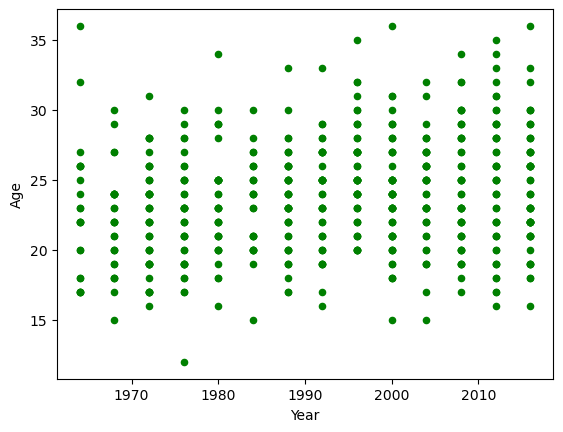

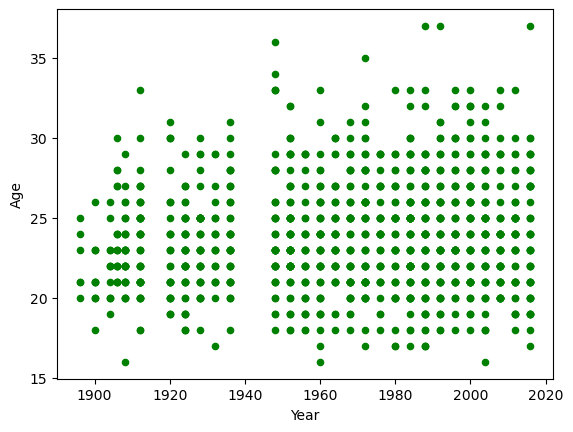

In [21]:
# Can get quick plots using pandas plotting
# (not very instructive: which group is which?)
df_grouped.plot(x="Year", y="Age", kind='scatter', color="g");

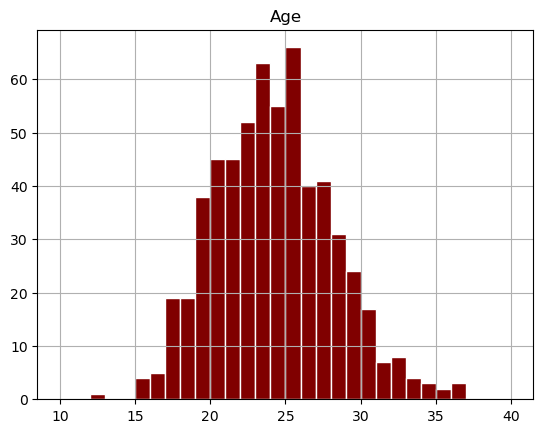

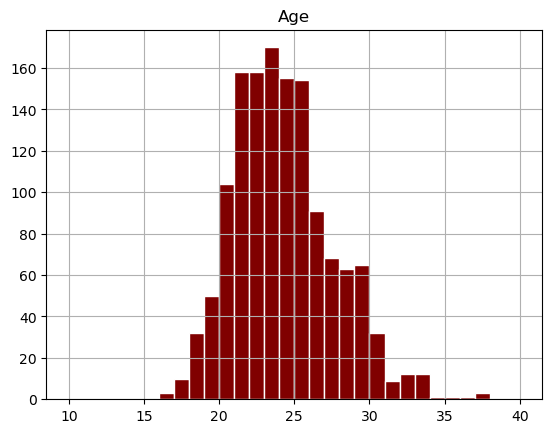

In [22]:
# Same issue here
df_grouped.hist("Age", bins=np.linspace(10,40,31),
                color="maroon", edgecolor="w");

### Iterating through groups: `groupby` returns an iterator to loop over groups and sub-`DataFrames`

In [23]:
# Typical interation over groups...
for group_key, group_value in df_grouped:
    print("\nGroup:", group_key)
    print(type(group_value))
    print(group_value.head())


Group: F
<class 'pandas.core.frame.DataFrame'>
                          Name Sex   Age  Height  Weight      Team  Year  \
1417             Aliyah Abrams   F  19.0   163.0    53.0    Guyana  2016   
1418  Folashade "Shade" Abugan   F  17.0   150.0    64.0   Nigeria  2008   
1419        Assumpta Achuo-Bei   F  20.0   159.0    55.0  Cameroon  1988   
1420     Asuncin Acosta Galano   F  18.0   169.0    52.0      Cuba  1972   
1421                Mercy Addy   F  20.0   161.0    58.0     Ghana  1984   

                             Event Medal  
1417  Athletics Women's 400 meters   NaN  
1418  Athletics Women's 400 meters   NaN  
1419  Athletics Women's 400 meters   NaN  
1420  Athletics Women's 400 meters   NaN  
1421  Athletics Women's 400 meters   NaN  

Group: M
<class 'pandas.core.frame.DataFrame'>
                    Name Sex   Age  Height  Weight     Team  Year  \
0   Abubakar Abbas Abbas   M  20.0   175.0    66.0  Bahrain  2016   
1            Maher Abbas   M  22.0   178.0    78.0 

### We can produce nicer plots by iterating through `groupby` objects. *You will do something in similar in Q4 and Q5 of the in-class exercise!*

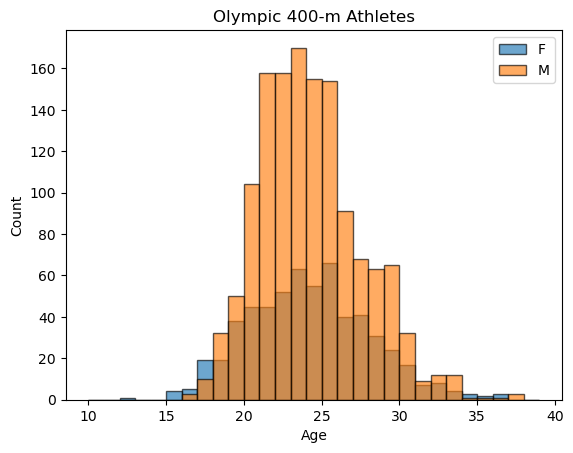

In [24]:
## Plot distribution of ages for each Sex
for group_key, group_value in df_grouped:
    plt.hist(group_value["Age"], range(10,40),
             alpha=0.65, label=group_key, edgecolor="k") # note the label to tag the group key
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Olympic 400-m Athletes')
plt.legend(loc='best');

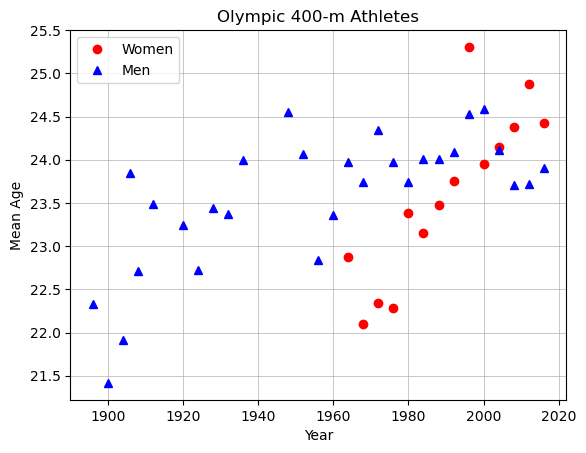

In [25]:
# Plot Age vs Year for each Group

# track the first time we plot for labeling purposes
firstm = True 
firstw = True

# iterate over groups: these are (sex, year) tuples
#     - the values here are dataframe subsets of that (sex, year)
for group_key, group_value in df_grouped2:
    
    # plot year versus mean age in each year: Men
    if(group_key[0] == 'M'): 
        if firstm: # with label
            plt.plot(group_key[1], group_value["Age"].mean(), 'b^', label = 'Men')
            firstm = False
        else:      # without label
            plt.plot(group_key[1], group_value["Age"].mean(), 'b^')
    
    # plot year versus mean age in each year: Women
    else: 
        if firstw: # with label
            plt.plot(group_key[1], group_value["Age"].mean(), 'ro', label = 'Women')
            firstw = False
        else:      # without label
            plt.plot(group_key[1], group_value["Age"].mean(), 'ro')

# format plot
plt.xlabel('Year')
plt.ylabel('Mean Age')
plt.grid(lw=0.5)
plt.title('Olympic 400-m Athletes')
plt.legend(loc='best');

## Data cleaning

Often, we have to deal with missing or ill-formatted data. There are many ways to deal with these issues, but not one uniform solution. Be very careful that you aren't compromising your later analysis in doing so. Sometimes it's better to leave empty rows as NaNs...

### One way to examine the athlete data is using `.info()`

In [26]:
# display information about the data
df_both.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    2011 non-null   object 
 1   Sex     2011 non-null   object 
 2   Age     1944 non-null   float64
 3   Height  1696 non-null   float64
 4   Weight  1684 non-null   float64
 5   Team    2011 non-null   object 
 6   Year    2011 non-null   int64  
 7   Event   2011 non-null   object 
 8   Medal   128 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 141.5+ KB


#### Age, Height, Weight, and Medal have fewer valid entries

### `.isnull()` will return boolean values indicating which values are missing

In [27]:
# which rows have null entries for Age?
df_both[df_both["Age"].isnull()].head()

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
30,Rashid Ismail Al-Jirbi,M,NaN,171.0,61.0,United Arab Emirates,1984,Athletics Men's 400 meters,NaN
45,Jos Manuel lvarez,M,NaN,170.0,NaN,Mexico,1932,Athletics Men's 400 meters,NaN
49,Guillermo J. Amparan,M,NaN,NaN,NaN,Mexico,1924,Athletics Men's 400 meters,NaN
52,Sotirios Anastasopoulos,M,NaN,NaN,NaN,Greece,1906,Athletics Men's 400 meters,NaN
54,William Davidson Anderson,M,NaN,NaN,NaN,Great Britain,1906,Athletics Men's 400 meters,NaN


### `.notnull()` is the opposite of `isnull()` and shows valid entries

In [28]:
# notnull() --> valid entries
df_both[df_both["Medal"].notnull()].head()

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
83,Alonzo Carl Babers,M,22.0,188.0,70.0,United States,1984,Athletics Men's 400 meters,Gold
91,Andrzej Stanisaw Badeski,M,21.0,173.0,68.0,Poland,1964,Athletics Men's 400 meters,Bronze
98,"James Allan ""Jimmy"" Ball",M,25.0,180.0,69.0,Canada,1928,Athletics Men's 400 meters,Silver
107,"Raymond James ""Ray"" Barbuti",M,22.0,183.0,82.0,United States,1928,Athletics Men's 400 meters,Gold
108,Nigel Chase Barker,M,23.0,NaN,NaN,Australia,1906,Athletics Men's 400 meters,Bronze


### `.dropna()` drops rows containing a missing value

In [29]:
# drops all rows with missing data
cleaned = df_both.dropna()
cleaned.info()
cleaned

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 83 to 2006
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    119 non-null    object 
 1   Sex     119 non-null    object 
 2   Age     119 non-null    float64
 3   Height  119 non-null    float64
 4   Weight  119 non-null    float64
 5   Team    119 non-null    object 
 6   Year    119 non-null    int64  
 7   Event   119 non-null    object 
 8   Medal   119 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 9.3+ KB


,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
83,Alonzo Carl Babers,M,22.0,188.0,70.0,United States,1984,Athletics Men's 400 meters,Gold
91,Andrzej Stanisaw Badeski,M,21.0,173.0,68.0,Poland,1964,Athletics Men's 400 meters,Bronze
98,"James Allan ""Jimmy"" Ball",M,25.0,180.0,69.0,Canada,1928,Athletics Men's 400 meters,Silver
107,"Raymond James ""Ray"" Barbuti",M,22.0,183.0,82.0,United States,1928,Athletics Men's 400 meters,Gold
146,Roger Anthony Black,M,30.0,190.0,79.0,Great Britain,1996,Athletics Men's 400 meters,Silver
...,...,...,...,...,...,...,...,...,...
1941,Irena Szewiska-Kirszenstein,F,30.0,176.0,60.0,Poland,1976,Athletics Women's 400 meters,Gold
1964,"De'Hashia Tonnek ""DeeDee"" Trotter",F,29.0,178.0,64.0,United States,2012,Athletics Women's 400 meters,Bronze
1987,Shericka Nicola Williams,F,22.0,170.0,64.0,Jamaica,2008,Athletics Women's 400 meters,Silver
1989,Tonique Williams-Darling,F,28.0,168.0,59.0,Bahamas,2004,Athletics Women's 400 meters,Gold


In [30]:
# note that this dataframe only has medal winners
cleaned.reset_index(drop=True, inplace=True) # reset the indices
cleaned # display

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
0,Alonzo Carl Babers,M,22.0,188.0,70.0,United States,1984,Athletics Men's 400 meters,Gold
1,Andrzej Stanisaw Badeski,M,21.0,173.0,68.0,Poland,1964,Athletics Men's 400 meters,Bronze
2,"James Allan ""Jimmy"" Ball",M,25.0,180.0,69.0,Canada,1928,Athletics Men's 400 meters,Silver
3,"Raymond James ""Ray"" Barbuti",M,22.0,183.0,82.0,United States,1928,Athletics Men's 400 meters,Gold
4,Roger Anthony Black,M,30.0,190.0,79.0,Great Britain,1996,Athletics Men's 400 meters,Silver
...,...,...,...,...,...,...,...,...,...
114,Irena Szewiska-Kirszenstein,F,30.0,176.0,60.0,Poland,1976,Athletics Women's 400 meters,Gold
115,"De'Hashia Tonnek ""DeeDee"" Trotter",F,29.0,178.0,64.0,United States,2012,Athletics Women's 400 meters,Bronze
116,Shericka Nicola Williams,F,22.0,170.0,64.0,Jamaica,2008,Athletics Women's 400 meters,Silver
117,Tonique Williams-Darling,F,28.0,168.0,59.0,Bahamas,2004,Athletics Women's 400 meters,Gold


### `.fillna()` - replace missing values
* `.fillna(value)` replaces NaNs with value

In [31]:
# we could replace those nans like so
df_both["Medal"] = df_both["Medal"].fillna('Participant')
df_both.head()

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
0,Abubakar Abbas Abbas,M,20.0,175.0,66.0,Bahrain,2016,Athletics Men's 400 meters,Participant
1,Maher Abbas,M,22.0,178.0,78.0,Lebanon,1988,Athletics Men's 400 meters,Participant
2,Moustafa Abdel Naser,M,21.0,176.0,74.0,Libya,1996,Athletics Men's 400 meters,Participant
3,Hassane Abdou,M,23.0,185.0,67.0,Comoros,1996,Athletics Men's 400 meters,Participant
4,Nagmeldin Ali Abubakr,M,18.0,172.0,63.0,Sudan,2004,Athletics Men's 400 meters,Participant


In [32]:
# much better
df_both.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    2011 non-null   object 
 1   Sex     2011 non-null   object 
 2   Age     1944 non-null   float64
 3   Height  1696 non-null   float64
 4   Weight  1684 non-null   float64
 5   Team    2011 non-null   object 
 6   Year    2011 non-null   int64  
 7   Event   2011 non-null   object 
 8   Medal   2011 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 141.5+ KB


In [33]:
# now, we drop the rows with missing Age or Height or Weight
cleaned2 = df_both.dropna()
cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1665 entries, 0 to 2010
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    1665 non-null   object 
 1   Sex     1665 non-null   object 
 2   Age     1665 non-null   float64
 3   Height  1665 non-null   float64
 4   Weight  1665 non-null   float64
 5   Team    1665 non-null   object 
 6   Year    1665 non-null   int64  
 7   Event   1665 non-null   object 
 8   Medal   1665 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 130.1+ KB


In [34]:
cleaned2 # notice, we still have the old row numbers

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
0,Abubakar Abbas Abbas,M,20.0,175.0,66.0,Bahrain,2016,Athletics Men's 400 meters,Participant
1,Maher Abbas,M,22.0,178.0,78.0,Lebanon,1988,Athletics Men's 400 meters,Participant
2,Moustafa Abdel Naser,M,21.0,176.0,74.0,Libya,1996,Athletics Men's 400 meters,Participant
3,Hassane Abdou,M,23.0,185.0,67.0,Comoros,1996,Athletics Men's 400 meters,Participant
4,Nagmeldin Ali Abubakr,M,18.0,172.0,63.0,Sudan,2004,Athletics Men's 400 meters,Participant
...,...,...,...,...,...,...,...,...,...
2006,Monika Zehrt (-Landgraf),F,19.0,168.0,56.0,East Germany,1972,Athletics Women's 400 meters,Gold
2007,Olha Mykolayivna Zemliak,F,26.0,165.0,57.0,Ukraine,2016,Athletics Women's 400 meters,Participant
2008,Boena Zientarska (-Markiewicz),F,19.0,165.0,58.0,Poland,1972,Athletics Women's 400 meters,Participant
2009,Nina Anatolivna Ziuskova,F,28.0,180.0,67.0,Soviet Union,1980,Athletics Women's 400 meters,Participant


In [35]:
# it is good practice to always do this
cleaned2.reset_index(drop=True, inplace=True)
cleaned2 # now we are good to go

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
0,Abubakar Abbas Abbas,M,20.0,175.0,66.0,Bahrain,2016,Athletics Men's 400 meters,Participant
1,Maher Abbas,M,22.0,178.0,78.0,Lebanon,1988,Athletics Men's 400 meters,Participant
2,Moustafa Abdel Naser,M,21.0,176.0,74.0,Libya,1996,Athletics Men's 400 meters,Participant
3,Hassane Abdou,M,23.0,185.0,67.0,Comoros,1996,Athletics Men's 400 meters,Participant
4,Nagmeldin Ali Abubakr,M,18.0,172.0,63.0,Sudan,2004,Athletics Men's 400 meters,Participant
...,...,...,...,...,...,...,...,...,...
1660,Monika Zehrt (-Landgraf),F,19.0,168.0,56.0,East Germany,1972,Athletics Women's 400 meters,Gold
1661,Olha Mykolayivna Zemliak,F,26.0,165.0,57.0,Ukraine,2016,Athletics Women's 400 meters,Participant
1662,Boena Zientarska (-Markiewicz),F,19.0,165.0,58.0,Poland,1972,Athletics Women's 400 meters,Participant
1663,Nina Anatolivna Ziuskova,F,28.0,180.0,67.0,Soviet Union,1980,Athletics Women's 400 meters,Participant


### `.replace(val1,val2)` - replace val1 with val2

In [36]:
# replace example
df_both["Event"] = df_both["Event"].replace("Athletics Men's 400 meters", "M400m")
df_both["Event"] = df_both["Event"].replace("Athletics Women's 400 meters", "W400m")
df_both

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
0,Abubakar Abbas Abbas,M,20.0,175.0,66.0,Bahrain,2016,M400m,Participant
1,Maher Abbas,M,22.0,178.0,78.0,Lebanon,1988,M400m,Participant
2,Moustafa Abdel Naser,M,21.0,176.0,74.0,Libya,1996,M400m,Participant
3,Hassane Abdou,M,23.0,185.0,67.0,Comoros,1996,M400m,Participant
4,Nagmeldin Ali Abubakr,M,18.0,172.0,63.0,Sudan,2004,M400m,Participant
...,...,...,...,...,...,...,...,...,...
2006,Monika Zehrt (-Landgraf),F,19.0,168.0,56.0,East Germany,1972,W400m,Gold
2007,Olha Mykolayivna Zemliak,F,26.0,165.0,57.0,Ukraine,2016,W400m,Participant
2008,Boena Zientarska (-Markiewicz),F,19.0,165.0,58.0,Poland,1972,W400m,Participant
2009,Nina Anatolivna Ziuskova,F,28.0,180.0,67.0,Soviet Union,1980,W400m,Participant


# Summary
* Combine/stack two DataFrames with identical formatting: `pd.concat`.
* Merging two DataFrames on a column of interest: `pd.merge`
* Groupby iterates or aggregates over groups in data: `pd.groupby`
* Data cleaning operations include dropping NaN values, replacing values etc.
* If you replace missing data, be careful: you may change the underlying statistics.